In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import seaborn as sns
%matplotlib inline 
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
df1 = pd.read_csv("Fraud.csv")

In [3]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df1.shape

(6362620, 11)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df1.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [8]:
missing_data(df1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,int64,object,float64,object,float64,float64,object,float64,float64,int64,int64


In [9]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [10]:
unique_values(df1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
Total,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620
Uniques,743,5,5316900,6353307,1845844,2682586,2722362,3614697,3555499,2,2


In [11]:
def plot_count(df, feature, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(3*size,2*size))
    total = float(len(df))
    sns.countplot(df[feature],order = df[feature].value_counts().index, palette='Set3')
    plt.title(title)
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.4f}%'.format(100*height/total),
                ha="center") 
    plt.show()

C:\Users\rushi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



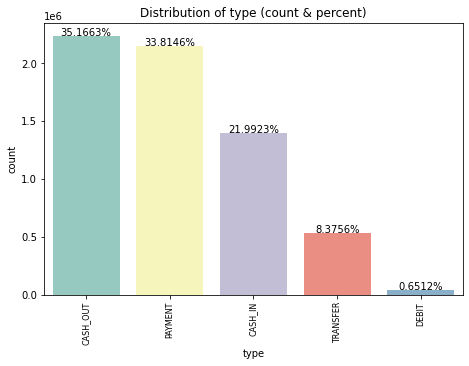

In [12]:
plot_count(df1, 'type', 'Distribution of type (count & percent)', size=2.5)

C:\Users\rushi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



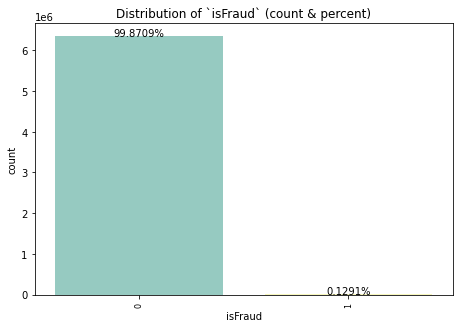

In [13]:
plot_count(df1, 'isFraud', 'Distribution of `isFraud` (count & percent)', size=2.5)

C:\Users\rushi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



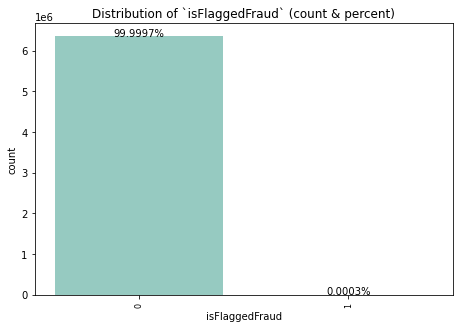

In [14]:
plot_count(df1, 'isFlaggedFraud', 'Distribution of `isFlaggedFraud` (count & percent)', size=2.5)

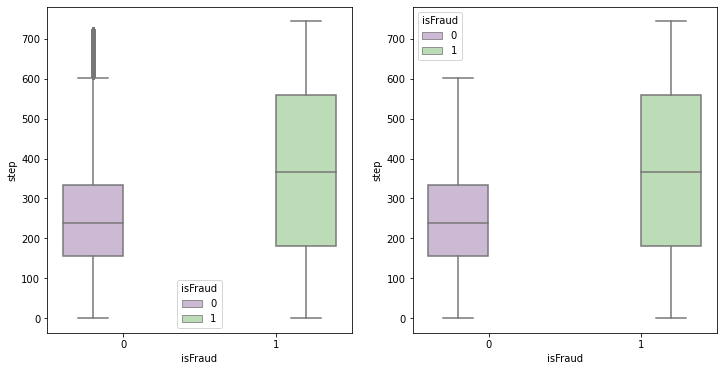

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="isFraud", y="step", hue="isFraud",data=df1, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="step", hue="isFraud",data=df1, palette="PRGn",showfliers=False)
plt.show()

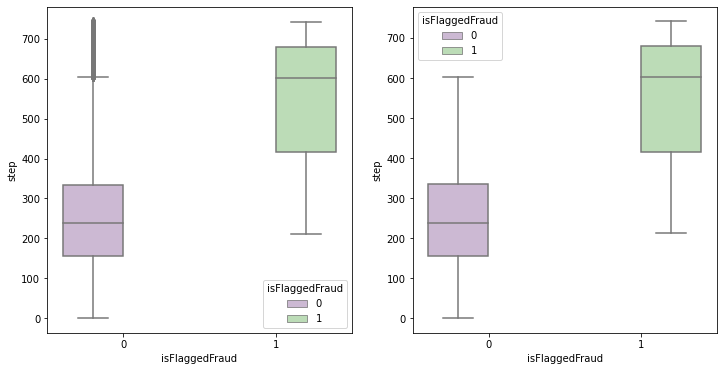

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="isFlaggedFraud", y="step", hue="isFlaggedFraud",data=df1, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFlaggedFraud", y="step", hue="isFlaggedFraud",data=df1, palette="PRGn",showfliers=False)
plt.show()

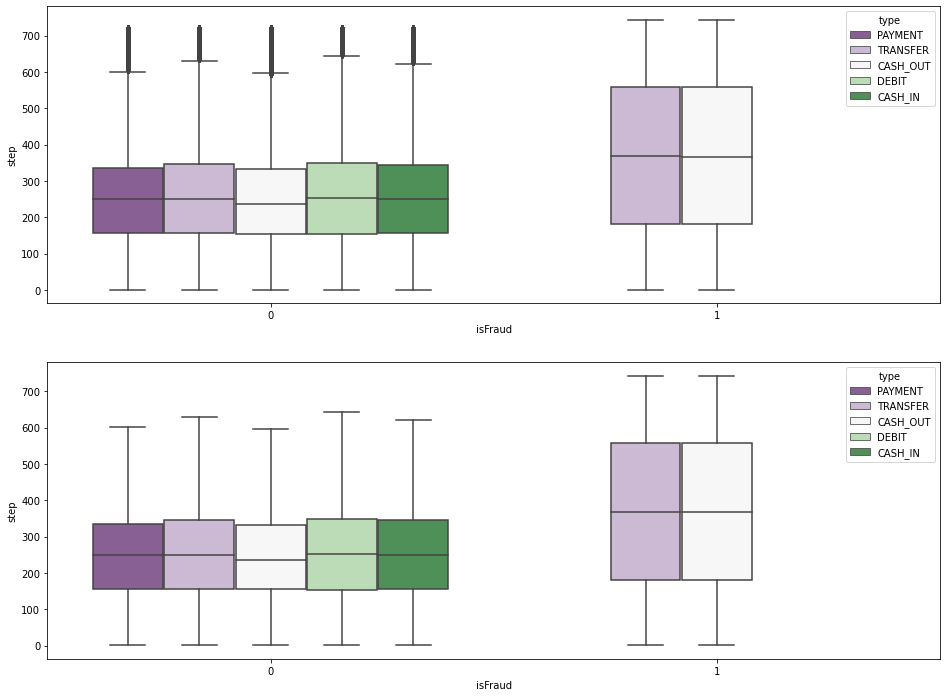

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="isFraud", y="step", hue="type",data=df1, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="step", hue="type",data=df1, palette="PRGn",showfliers=False)
plt.show()

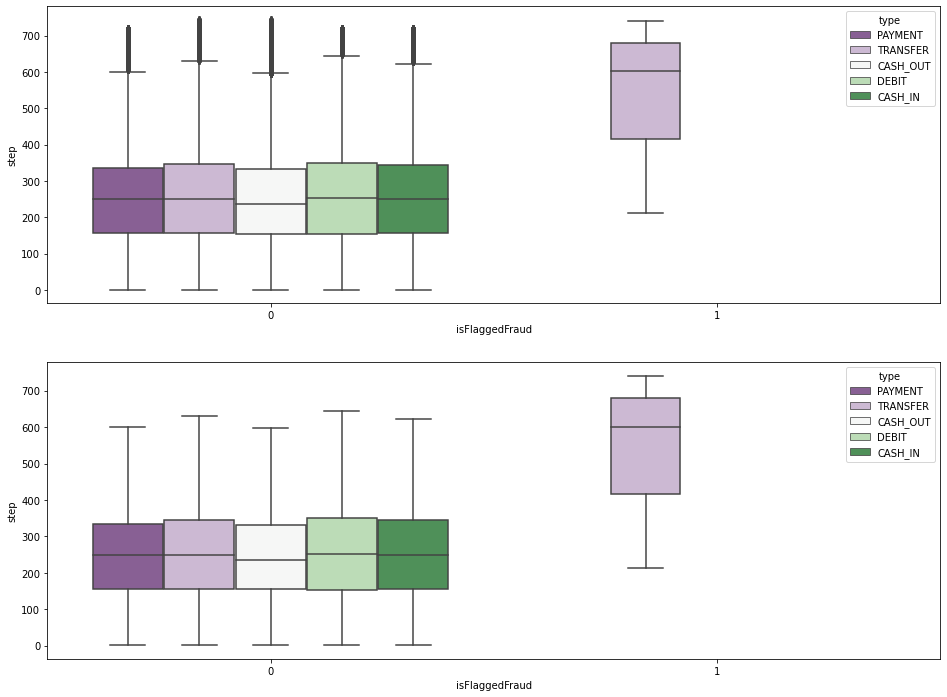

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="isFlaggedFraud", y="step", hue="type",data=df1, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFlaggedFraud", y="step", hue="type",data=df1, palette="PRGn",showfliers=False)
plt.show()

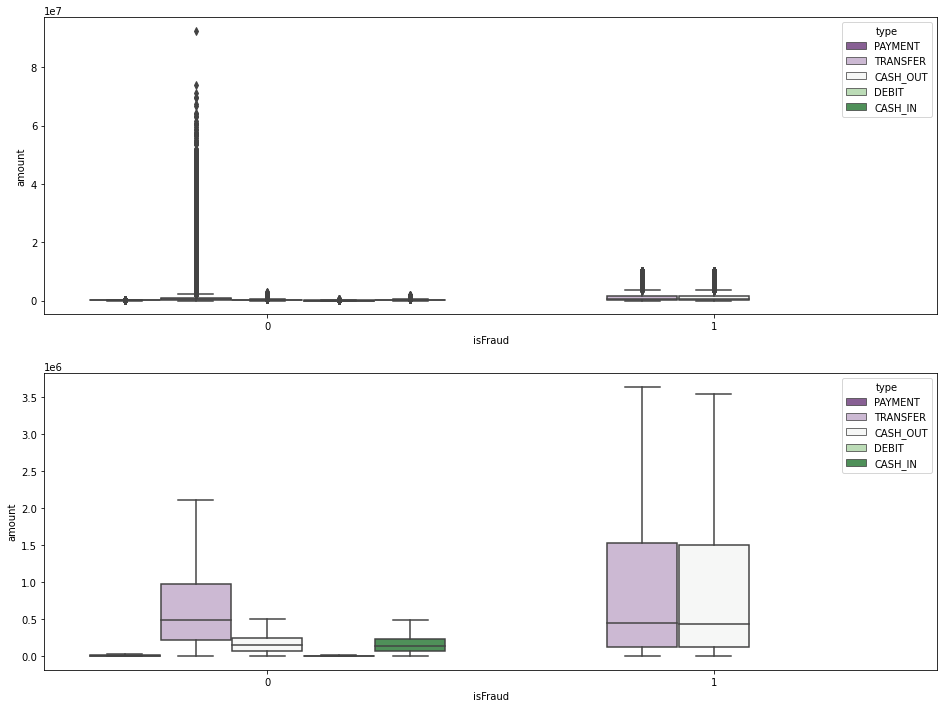

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="isFraud", y="amount", hue="type",data=df1, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="amount", hue="type",data=df1, palette="PRGn",showfliers=False)
plt.show()

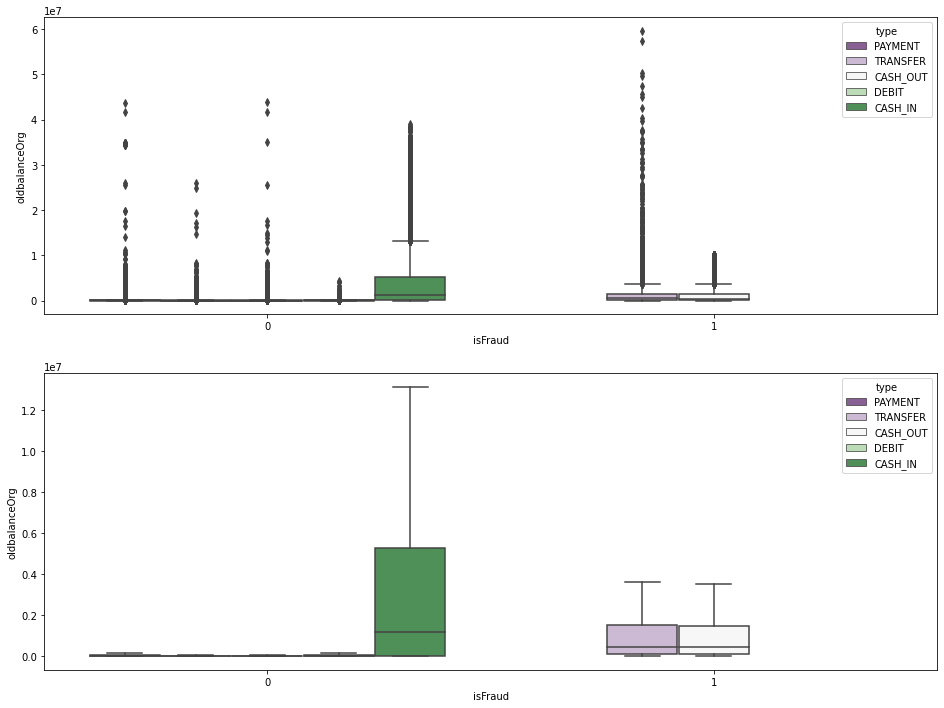

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="isFraud", y="oldbalanceOrg", hue="type",data=df1, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="oldbalanceOrg", hue="type",data=df1, palette="PRGn",showfliers=False)
plt.show()

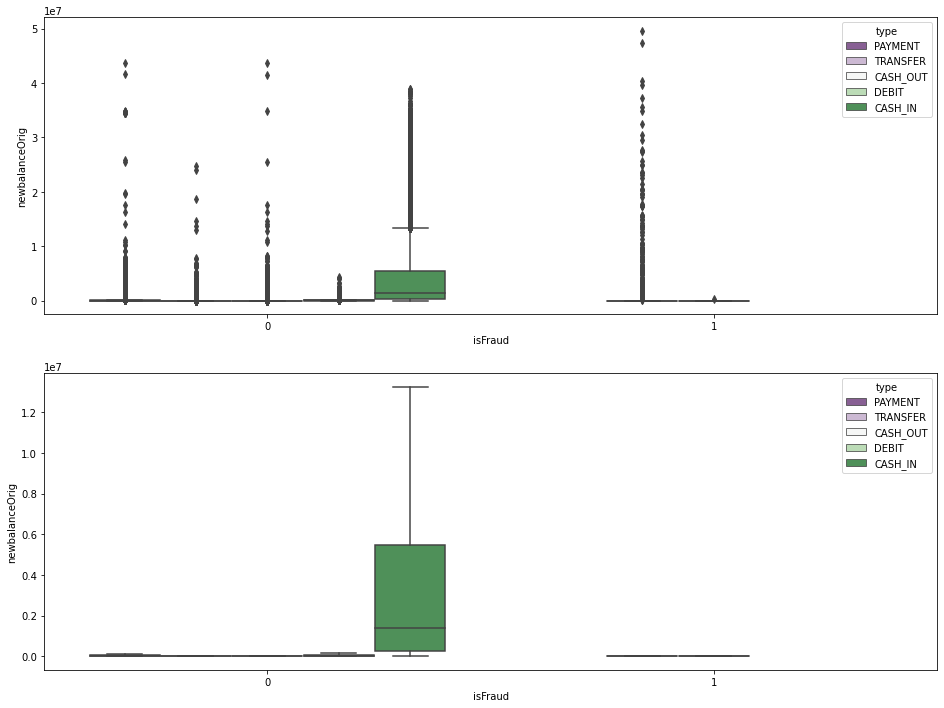

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="isFraud", y="newbalanceOrig", hue="type",data=df1, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="newbalanceOrig", hue="type",data=df1, palette="PRGn",showfliers=False)
plt.show()

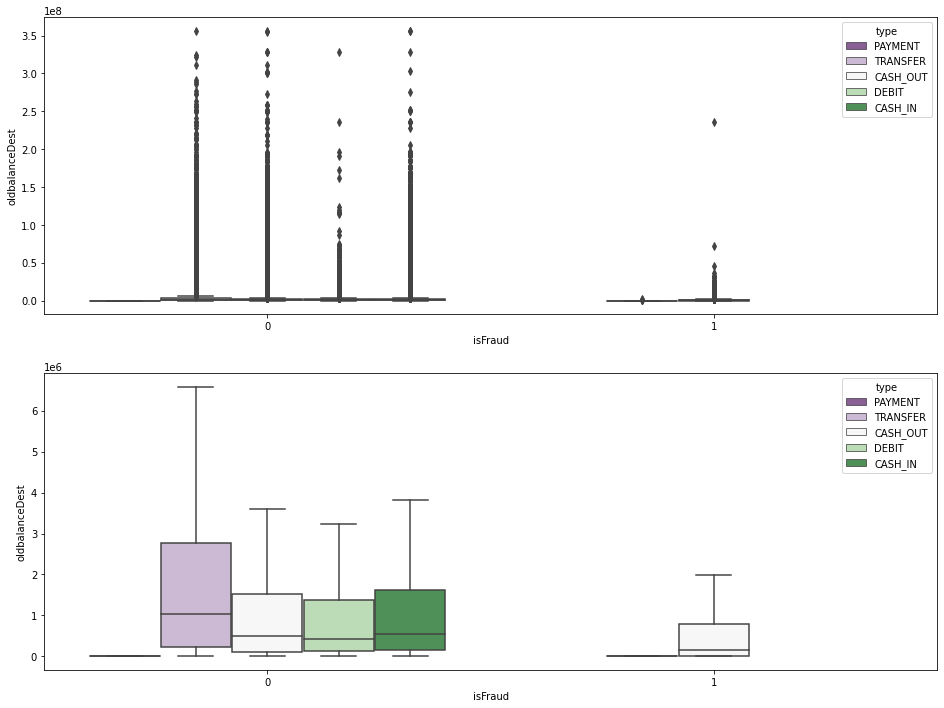

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="isFraud", y="oldbalanceDest", hue="type",data=df1, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="oldbalanceDest", hue="type",data=df1, palette="PRGn",showfliers=False)
plt.show()

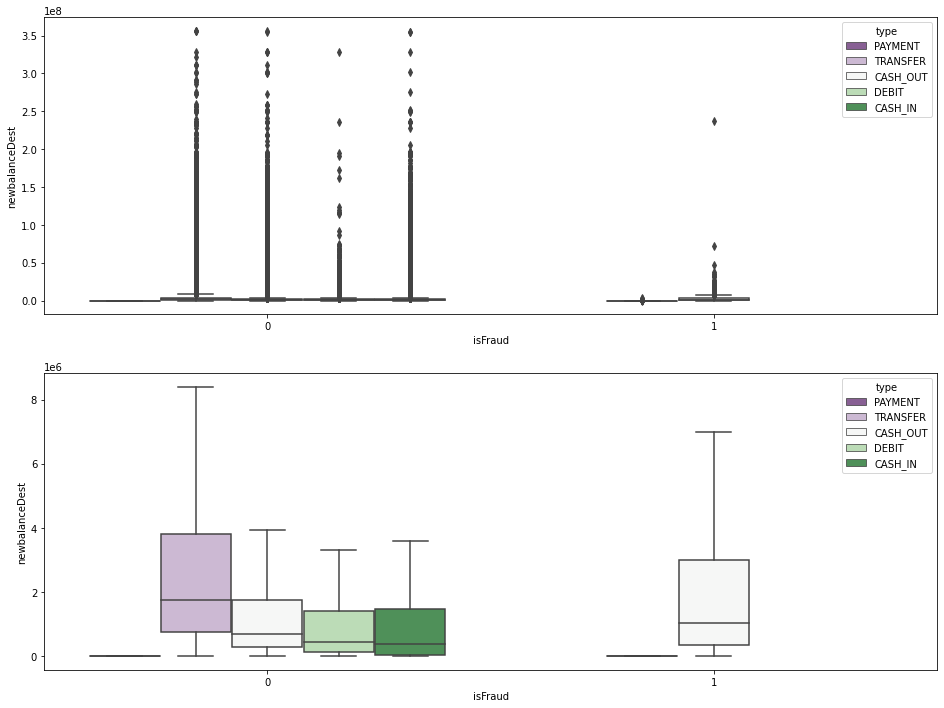

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,12))
s = sns.boxplot(ax = ax1, x="isFraud", y="newbalanceDest", hue="type",data=df1, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="newbalanceDest", hue="type",data=df1, palette="PRGn",showfliers=False)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

In [25]:
X = df1.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df1.isFraud

In [26]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

In [27]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

C:\Users\rushi\AppData\Local\Temp/ipykernel_20560/1393882008.py:1: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [28]:
clf = CatBoostClassifier(iterations=200,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 20,
                             od_wait=25)

In [29]:
clf.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7412193	best: 0.7412193 (0)	total: 9.39s	remaining: 31m 8s
20:	test: 0.9961560	best: 0.9961560 (20)	total: 3m 53s	remaining: 33m 8s
40:	test: 0.9968911	best: 0.9968911 (40)	total: 8m 11s	remaining: 31m 47s
60:	test: 0.9973002	best: 0.9973002 (60)	total: 12m 18s	remaining: 28m 2s
80:	test: 0.9977846	best: 0.9978036 (75)	total: 16m 25s	remaining: 24m 7s
100:	test: 0.9979212	best: 0.9979212 (100)	total: 20m 24s	remaining: 20m
120:	test: 0.9980061	best: 0.9980118 (114)	total: 24m 28s	remaining: 15m 59s
140:	test: 0.9980682	best: 0.9980682 (140)	total: 28m 52s	remaining: 12m 4s
160:	test: 0.9981527	best: 0.9981527 (160)	total: 33m 22s	remaining: 8m 5s
180:	test: 0.9982653	best: 0.9982653 (180)	total: 37m 46s	remaining: 3m 57s
199:	test: 0.9983894	best: 0.9983894 (199)	total: 42m 42s	remaining: 0us

bestTest = 0.9983894423
bestIteration = 199



In [30]:
preds = clf.predict(X_validation)

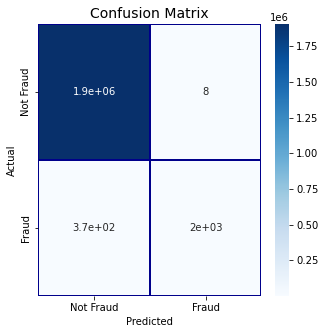

In [31]:
cm = pd.crosstab(y_validation.values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [32]:
print(f"ROC-AUC score: {roc_auc_score(y_validation.values, preds)}")

ROC-AUC score: 0.9229630180593044
